In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
movie = pd.read_csv('movies.csv')

In [98]:
movie = movie[['Title','Year','Genre','Star Rating', 'Rank', 'Runtime','Rating']]

In [99]:
# getting the genres to only be one genre
for i in range(0,64):
    if movie['Genre'][i].__contains__(','):
        movie['Genre'] = movie['Genre'].str.split(",",1,expand = True)[0]

In [100]:
#movie['Year'] = movie['Year'].astype(str)
movie.info()
movie['Year'][11] = 2015
movie['Year'][17] = 2014

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        64 non-null     object 
 1   Year         64 non-null     object 
 2   Genre        64 non-null     object 
 3   Star Rating  64 non-null     float64
 4   Rank         64 non-null     int64  
 5   Runtime      64 non-null     object 
 6   Rating       64 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.6+ KB


C:\Users\caitl\AppData\Local\Temp\ipykernel_5808\645574520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Year'][11] = 2015
C:\Users\caitl\AppData\Local\Temp\ipykernel_5808\645574520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Year'][17] = 2014


In [102]:
movie1 = movie.groupby(['Year'], as_index = False)['Star Rating'].mean()

In [103]:
movie1.head(64)
movie1['Year'] = movie1['Year'].astype(int)
movie1 = movie1[movie1['Year'] > 1950]

Text(0, 0.5, 'Average Rating')

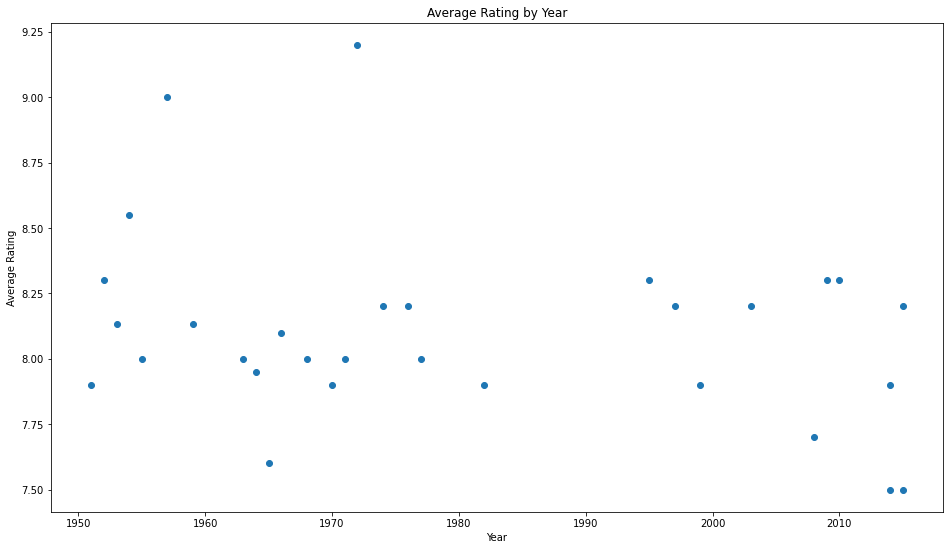

In [150]:
plt.figure(figsize=(16,9))
#plt.plot(movie1['Year'], movie1['Star Rating'])
plt.scatter(movie1['Year'], movie1['Star Rating'])
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')

Text(0.5, 1.0, 'Average Rating by Year')

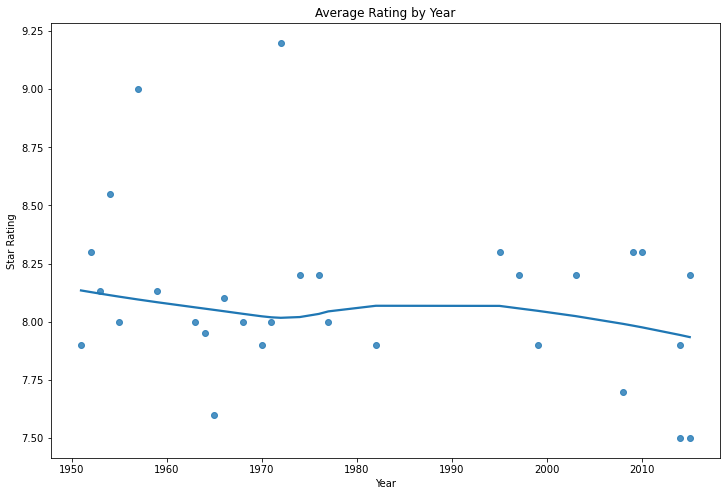

In [154]:
plt.figure(figsize = (12,8))
sns.regplot(data = movie1, x = 'Year', y = 'Star Rating', lowess = True)
plt.title('Average Rating by Year')

In [105]:
movie2 = movie.groupby(['Genre'], as_index = False)['Star Rating'].mean()

Text(0, 0.5, 'Average Rating')

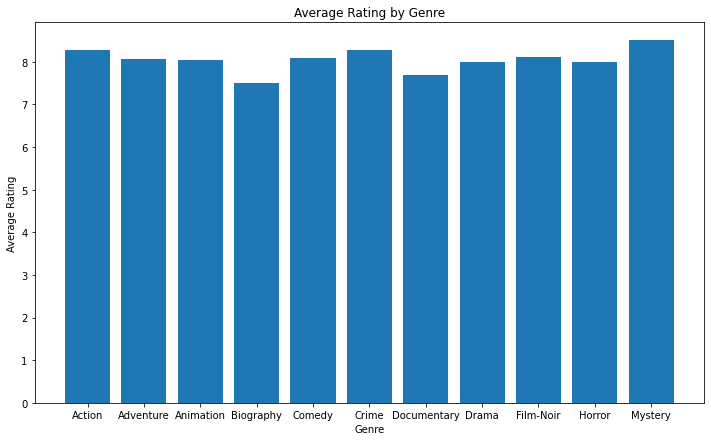

In [130]:
plt.figure(figsize=(12,7))
plt.bar(movie2['Genre'], movie2['Star Rating'])
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')

Text(0, 0.5, 'Star Rating')

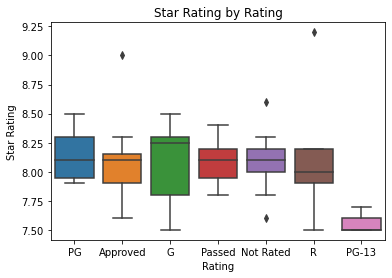

In [151]:
sns.boxplot(x="Rating", y="Star Rating", data = movie)
plt.title('Star Rating by Rating')
plt.xlabel('Rating')
plt.ylabel('Star Rating')

In [131]:
movie.head()

,Title,Year,Genre,Star Rating,Rank,Runtime,Rating
0,The Wizard of Oz,1939,Adventure,8.1,1,102 min,PG
1,The Third Man,1949,Film-Noir,8.1,2,93 min,Approved
2,Citizen Kane,1941,Drama,8.3,3,119 min,PG
3,Modern Times,1936,Comedy,8.5,4,87 min,G
4,All About Eve,1950,Drama,8.2,5,138 min,Passed


In [137]:
movie['Runtime'] = movie['Runtime'].str.split(" ",1,expand = True)[0].astype(int)

<AxesSubplot:xlabel='Runtime', ylabel='Star Rating'>

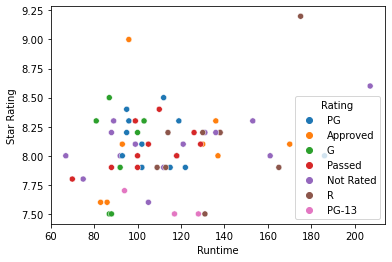

In [141]:
sns.scatterplot(data = movie, x = 'Runtime', y = 'Star Rating', hue = 'Rating')

<AxesSubplot:xlabel='Genre', ylabel='Runtime'>

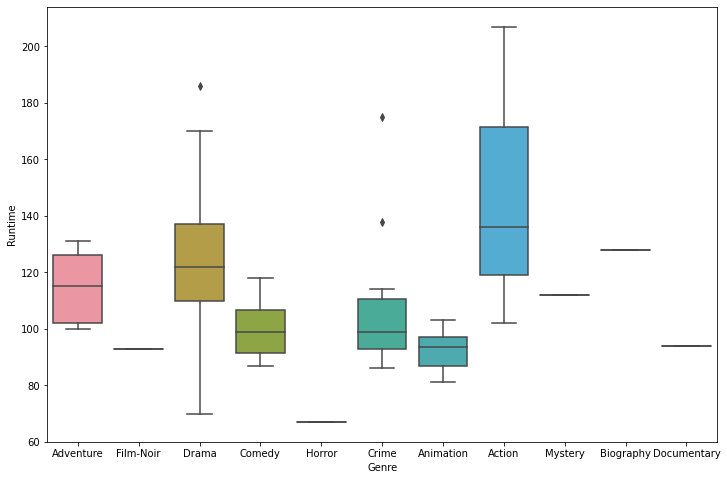

In [144]:
plt.figure(figsize = (12,8))
sns.boxplot(x="Genre", y="Runtime", data = movie)

<AxesSubplot:xlabel='Rating', ylabel='Runtime'>

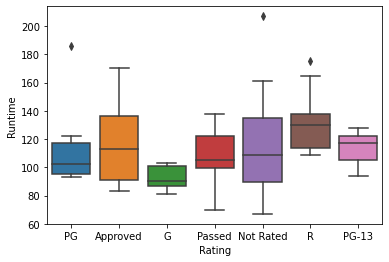

In [146]:
sns.boxplot(x="Rating", y="Runtime", data = movie)